In [60]:
# --------------------------------------------------------------------------------
# [파이썬 3일차 실습 1 - Pandas + Seaborn 분석 리포트 생성하기]
#
# 작성자(author): 장아현
# 작성일자(date): 2026.01.29
# 변경내역(description): Pandas로 AI 임베딩 전처리를 위한 통계 요약 및 이상치 탐지
# --------------------------------------------------------------------------------
# - 실습 가이드
#   1단계 - 데이터 전처리
#     . reviews.csv 파일 호출
#     . 결측치 확인/처리
#     . 분포 시각화 및 이상치 탐지
#   2단계 - 기술 통계 및 시각화
#     . review_length 등 기술 통계 요약
#     . category 별 평균 평점 시각화 (barplot)
#     . 평점과 감성 점수 관계 시각화
#     . 텍스트 길이와 평점의 관계 (boxplot or violinplot)
#   3단계 - AI 분석을 위한 인사이트 도출
#     . sentiment_score가 높을 수록 평점이 높나?
#     . Review_length가 AI 임베딩 유사도에 영향을 줄 수 있나?
#     . category 별 감성 점수 평균 차이는 존재?
#     . 위의 질문에 대한 그래프 기반 해석 및 3줄 요약 Insight 작성
#   4단계 - Report 작성
#     . 결과 리포트 작성 시 제목/목차/시각화 포함
#     . 분석 코드와 인사이트를 정리
# --------------------------------------------------------------------------------

In [61]:
# 필요한 라이브러리와 데이터 불러오기
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# csv 파일 호출
df = pd.read_csv('reviews_1000.csv')

## 1단계 - 데이터 전처리

In [62]:
# 행과 열의 개수 출력
print('\n1. 행과 열의 개수 출력하기')
print(df.shape)


1. 행과 열의 개수 출력하기
(1000, 8)


In [76]:
# 상위 5개 행 출력
print('\n2. 상위 5개의 행 출력하기')
print(df.head())


2. 상위 5개의 행 출력하기
  review_id product_id category                         review_text  \
0     R0001       P158     home  Amazing quality and fast shipping.   
1     R0002       P117  fashion         Just okay, nothing special.   
2     R0003       P160  fashion                Not worth the money.   
3     R0004       P127  fashion         Just okay, nothing special.   
4     R0005       P151     home         Just okay, nothing special.   

   review_length  num_words  sentiment_score  rating  
0            134         27            -0.60       3  
1            115         28            -0.10       5  
2            139         32             0.20       5  
3            165         32             0.22       4  
4            112         15            -0.03       4  


In [64]:
# 데이터 타입 및 결측치 확인
print('3. 데이터 타입 및 결측치 확인하기')
print(df.info())

3. 데이터 타입 및 결측치 확인하기
<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        1000 non-null   str    
 1   product_id       1000 non-null   str    
 2   category         1000 non-null   str    
 3   review_text      995 non-null    str    
 4   review_length    1000 non-null   int64  
 5   num_words        1000 non-null   int64  
 6   sentiment_score  995 non-null    float64
 7   rating           1000 non-null   int64  
dtypes: float64(1), int64(3), str(4)
memory usage: 62.6 KB
None


In [65]:
# 결측치가 있는지 확인하기
# 위에서 de.info() 실행시 review_text, sentiment_score 칼럼만 995개 (나머지 1000개)
# na가 있음을 확실히 확인 => na 개수 출력
df.isna().sum()

review_id          0
product_id         0
category           0
review_text        5
review_length      0
num_words          0
sentiment_score    5
rating             0
dtype: int64

In [66]:
# NaN이 있는 행 출력하기
df[df.isna().any(axis=1)]

,review_id,product_id,category,review_text,review_length,num_words,sentiment_score,rating
20,R0021,P111,home,NaN,163,41,1.00,5
26,R0027,P199,fashion,NaN,85,25,-0.28,4
50,R0051,P108,sports,NaN,129,16,0.17,3
102,R0103,P199,electronics,"Just okay, nothing special.",109,30,NaN,1
123,R0124,P141,sports,NaN,77,39,0.49,1
131,R0132,P143,sports,"Terrible experience, would not buy again.",122,18,NaN,3
134,R0135,P106,fashion,Not worth the money.,92,31,NaN,4
155,R0156,P153,fashion,"Just okay, nothing special.",98,17,NaN,5
162,R0163,P198,electronics,"Terrible experience, would not buy again.",154,24,NaN,2
174,R0175,P163,fashion,NaN,128,40,0.61,4


In [67]:
# sentiment_score와 review_text의 값이 다른 값들과 연관된 점이 보이지 않아서
# 결측치가 있는 행 삭제한 데이터 df_dropped
df_dropped = df.dropna()

df_dropped.info()
df_dropped.isna().sum()

<class 'pandas.DataFrame'>
Index: 990 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        990 non-null    str    
 1   product_id       990 non-null    str    
 2   category         990 non-null    str    
 3   review_text      990 non-null    str    
 4   review_length    990 non-null    int64  
 5   num_words        990 non-null    int64  
 6   sentiment_score  990 non-null    float64
 7   rating           990 non-null    int64  
dtypes: float64(1), int64(3), str(4)
memory usage: 69.6 KB


review_id          0
product_id         0
category           0
review_text        0
review_length      0
num_words          0
sentiment_score    0
rating             0
dtype: int64

## 2단계 - 분포 시각화 및 이상치 탐지

### 각 항목별 리뷰 수 분포 시각화

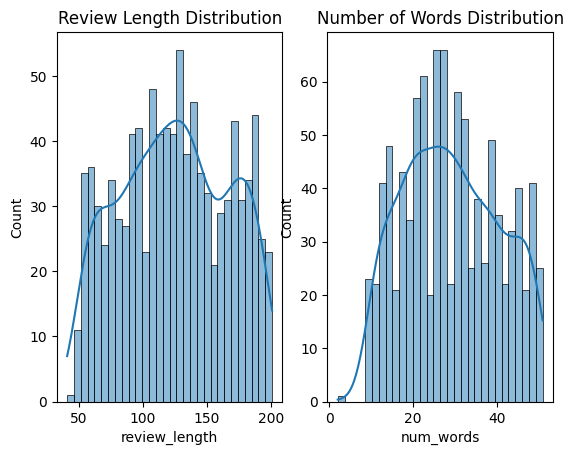

In [69]:
fig, axes = plt.subplots(1, 2)

# review_length
sns.histplot(df_dropped["review_length"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Review Length Distribution")

# num_words
sns.histplot(df_dropped["num_words"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Number of Words Distribution")

plt.show()

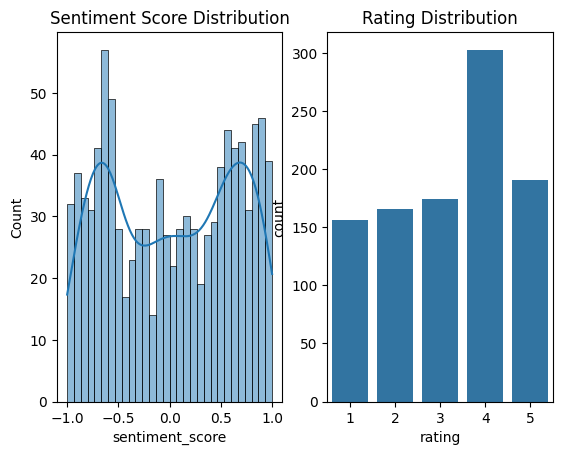

In [70]:
fig, axes = plt.subplots(1, 2)

# sentiment_score
sns.histplot(df_dropped["sentiment_score"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Sentiment Score Distribution")

# rating
sns.countplot(x="rating", data=df_dropped, ax=axes[1])
axes[1].set_title("Rating Distribution")

plt.show()

### 각 단일 분포별 개수 확인하기

In [71]:
# 기술 통계 요약
df_dropped[["review_length", "num_words", "sentiment_score", "rating"]].describe()

,review_length,num_words,sentiment_score,rating
count,990.000000,990.000000,990.000000,990.000000
mean,124.810101,29.175758,0.023131,3.209091
std,41.723272,11.325206,0.616607,1.354212
min,41.000000,2.000000,-1.000000,1.000000
25%,92.250000,20.000000,-0.590000,2.000000
50%,125.500000,28.000000,0.030000,3.000000
75%,161.000000,38.000000,0.600000,4.000000
max,201.000000,51.000000,1.000000,5.000000


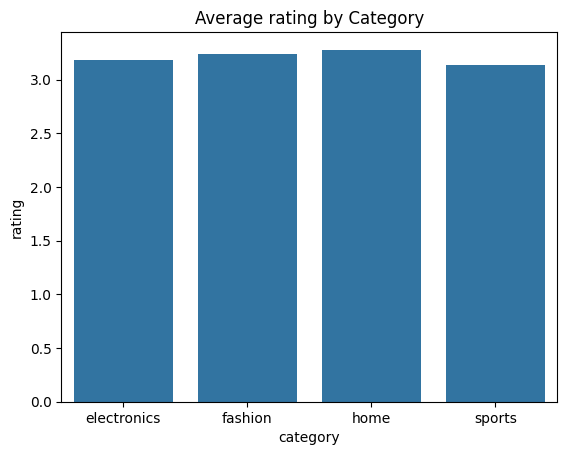

In [72]:
# barplot을 활용한 category 별 평점 평균 시각화

category_rating_mean = df_dropped.groupby('category')['rating'].mean().reset_index()

sns.barplot(x='category', y='rating', data=category_rating_mean )
plt.title('Average rating by Category')
plt.show()

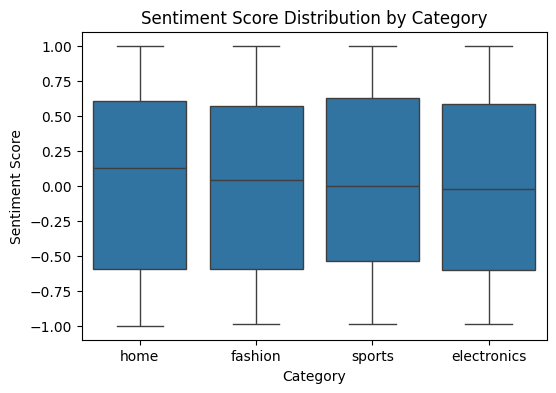

In [73]:
# category 별 감성 점수 평균
plt.figure(figsize=(6,4))
sns.boxplot(
    x='category',
    y='sentiment_score',
    data=df_dropped
)
plt.title('Sentiment Score Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sentiment Score')
plt.show()

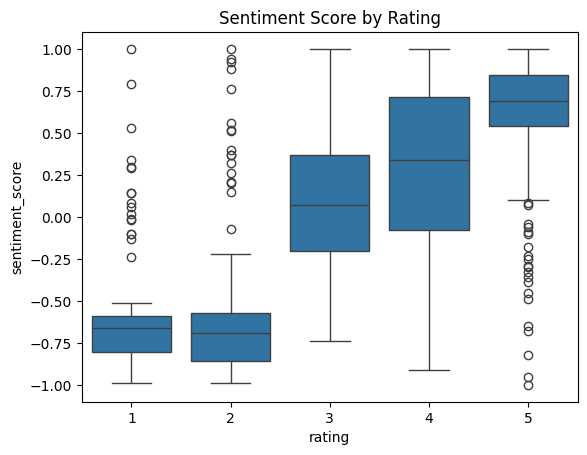

In [74]:
# 평점과 감성 점수 관계 시각화

sns.boxplot(x="rating", y="sentiment_score", data=df_dropped)
plt.title("Sentiment Score by Rating")
plt.show()

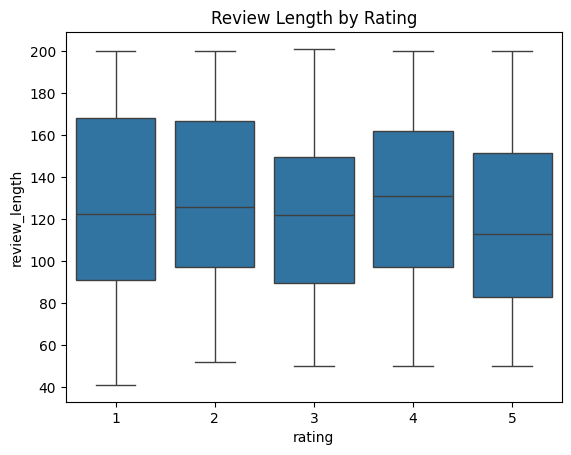

In [75]:
# 텍스트 길이와 평점의 관계 
sns.boxplot(x="rating", y="review_length", data=df_dropped)
plt.title("Review Length by Rating")
plt.show()

## 3단계 - AI 분석을 위한 인사이트 도출

### 1. sentiment_score가 높을수록 평점이 많나? 
- 평점별 감성 점수 분포를 확인한 결과, 평점이 낮을수록 감성 점수의 중앙값은 음수 영역에 위치하고,<br/>평점이 높아질수록 중앙값이 양수 영역으로 이동하는 경향을 보였다.<br/>이를 통해 감성 점수와 평점 간에는 양의 상관관계가 존재함을 확인할 수 있다.<br/><br/> 또한 박스플롯에서 일부 평점 구간에서는 감성 점수와 평점이 일치하지 않는 이상치가 관찰되었는데,<br/> 이는 사용자마다 평가 기준이 상이함을 반영한 결과로 해석할 수 있다.

### 2. review_text가 AI 임베딩 유사도에 영향을 줄 수 있나? 
- AI 임베딩 유사도는 텍스트의 의미적 유사성을 기반으로 계산된다. 만약 리뷰 텍스트의 길이가 평점에 따라 크게 차이를 보인다면,<br/> 임베딩 결과가 텍스트 길이에 의해 왜곡될 가능성이 존재한다.<br/><br/> 그러나 평점별 리뷰 길이 분포를 비교한 결과, 각 평점 구간에서 리뷰 길이의 중앙값과 분산이 유사한 수준을 보였다.<br/> 이를 통해 리뷰 텍스트의 길이 자체는 AI 임베딩 유사도에 직접적인 영향을 주는 주요 요인으로 보기 어렵다고 판단된다.

### 3. category 별 감성 점수의 평균 차이는 존재하나?
- 카테고리별 감성 점수 분포를 비교한 결과, 모든 카테고리에서 감성 점수의 중앙값은 0 부근에 위치하며 분포 범위 또한 유사한 수준을 보였다. <br/><br/>이를 통해 카테고리에 따른 감성 점수의 뚜렷한 차이는 관찰되지 않았으며,<br/> 감성 차이는 카테고리보다는 개별 리뷰 내용에 의해 결정될 가능성이 높다고 해석할 수 있다.

## 3줄 INSIGHT
1. 감성 점수는 평점이 증가할수록 함께 상승하는 경향을 보여, 두 변수 간 양의 상관관계가 확인되었다.
2. 평점별 리뷰 길이 분포가 유사하여, 리뷰 길이 자체는 AI 임베딩 유사도에 유의미한 영향을 주지 않는 것으로 판단된다.
3. 카테고리별 감성 점수 분포는 전반적으로 유사하여, 감성 차이는 카테고리보다 개별 리뷰 내용에 의해 결정되는 것으로 해석된다.